<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Variogram Modeling

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

Cite as: Pyrcz, M.J., 2024, Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy, https://geostatsguy.github.io/GeostatsPyDemos_Book. 

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Variogram Modeling** with GeostatsPy. 

**YouTube Lecture**: check out my lectures on:
        
* [Variogram Introduction](https://youtu.be/jVRLGOsnYuw?si=RD5exyGl_I_LAl4H)
* [Variogram Calculation](https://youtu.be/mzPLicovE7Q?si=-ZPgFK52h2xp1cER)
* [Variogram Parameters](https://youtu.be/NE4xfhIHAm4?si=dF18zj5_M2yVwxoD)
* [Variogram Directions](https://youtu.be/bryRCrtf3hk?si=058uFy-eTtTqwNPr)
* [Variogram Modeling](https://youtu.be/-Bi63Y3u6TU?si=-kwvFLicNTbg85xL)

For your convenience here's a summary of salient points.

#### Variogram Interpretation

Before we model our variograms, let's make sure that we understand common observed variogram interpretation cues.

**Geometric Anisotropy** - the same structures are observed, but the range depends on the direction

Commonly, the vertical range of correlation is much less than the horizontal range due to the formation of layering due to sedimentary processes.

<figure style="text-align: center;">
  <img src="_static/variogram_model/geometric_anisotropy.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Geometric anisotropy, exhaustive dataset (above) and experimental variograms (below).
</figcaption>
</figure>

* the ratio of the horizontal:vertical range is commonly known as the horizontal to vertical anisotropy ratio

* geometric anisotropy is common for the horizontal directions also 

We assume geometric anisotropy to model 2D and 3D variogram from experimental variograms calculated in primary directions,

* this model provides a valid interpolation of the variogram between the primary directions.

This is assumed to build nested variogram models with structures that:

* describe components of the variance

* act over all directions.
 
**Variogram Cyclicity** - cyclicity may be linked to underlying geological periodicity, cycles in the deposition

<figure style="text-align: center;">
  <img src="_static/variogram_model/cyclicity.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Cyclicity in the $Y$ direction, exhaustive dataset (above) and experimental variograms (below).
</figcaption>
</figure>

* sometimes noise in the experimental variogram due to too few data is mistaken as cyclicity

* the wavelength of the cycles in the experimental variogram is the wavelength of the spatial cycles

**Zonal Anisotropy** - When the experimental variogram does not reach the sill in a direction

* often paired with cyclicity or trend in the other (orthogonal) direction
  
* the variance at which the variogram levels off is called an apparent sill

<figure style="text-align: center;">
  <img src="_static/variogram_model/zonal_anisotropy.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Zonal anisotropy in the $X$ direction, exhaustive dataset (above) and experimental variograms (below).
</figcaption>
</figure>

We can use the apparent sill to partition variance,

* variability within layers - the apparent sill

* variability between layers - sill minus the apparent sill

**Variogram Trend** - experimental variogram points rise approximately linearly above the sill.

* indicates a trend in the spatial data, for example, fining upward, compacting with depth, etc.

* could be interpreted as a fractal, fit a power law function

May have to explicitly account for the trend in later simulation/modeling

* model, remove the trend, work with the residual 

* if the trend is removed the residual variogram will plateau at the sill, we cannot model our variograms above the sill 

<figure style="text-align: center;">
  <img src="_static/variogram_model/trend.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Trend in the $Y$ direction, exhaustive dataset (above) and experimental variograms (below).
</figcaption>
</figure>

Here's a fun example with the spatial continuity of Holstein cows

* variogram interpretation consists of explaining the variability over different distance scales.

* here’s a cow image converted to greyscale and cropped to improve stationarity.

If you want to try your own image, my workflow is in the chapter [Variogram Calculation from Image](GeostatsPy_variogram_from_image).

<figure style="text-align: center;">
  <img src="_static/variogram_model/cows.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Spatial continuity of a image of cows (above) and resulting experimental variograms (below).
</figcaption>
</figure>

Do you see the geometric anisotropy and cyclicity? Can you identify the $X$ and $Y$ directional, experimental variograms without looking at the labels?

#### Reasons for Variogram Modeling

Why do we model the variogram? Why don't we just stop with our directional, experimental variograms calculated in the major and minor directions?

1. Need to know the variogram for all possible $\bf{h}$ lags, distances and directions, not just the ones calculated, i.e., first, second, etc. lags in the major and minor directions.

<figure style="text-align: center;">
  <img src="_static/variogram_model/reasons.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Spatial continuity of a image of cows (above) and resulting experimental variograms (below).
</figcaption>
</figure>

2. Incorporate additional geological knowledge, such as analogue information or information on directions of continuity, etc.

3. The variogram model must be positive definite, a legitimate measure of distance, that is, the variance of any linear combination must be positive

#### Variogram Modeling

Spatial continuity can be flexibly modeled with nested variogram models, $\gamma_i(\bf{ h })$:

$$
\Gamma_x(\bf{ h }) = \sum_{i=1}^{nst} \gamma_i(\bf{ h })
$$

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variograms  $\gamma_i(\bf{h})$.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction.

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes aligned with and set to the major and minor for the variogram.

$$
\bf{ h } _i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
$$

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested component of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

#### Variogram Positive Definite Structures

The types of structure commonly applied include:

* spherical
* exponential
* Gaussian
* nugget

for visualizations of the these variogram structures, see chapter [Variogram Positive Definite Models](GeostatsPy_variogram_models).

Other less common models include:

* hole effect
* dampened hole effect
* power law

these will not be covered here.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.

* in 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$

* note, the range in the minor direction (orthogonal to the major direction)
  
The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes aligned with and set to the major and minor for the variogram.

$$
\bf{h}_i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
$$

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested component of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

Some comments on modeling nested variograms:

* we can capture nugget, short and long range continuity structures
* we rely on the geometric anisotropy model, so all structures must inform the same level of contribution (proportion of the sill) in all directions.

* the geometric anisotropy model is based on azimuth of the major direction of continuity, range in the major direction and range in the minor direction (orthogonal to the major direction).  The range is interpolated between the major and minor azimuths with a ellipse model

* we can vary the type of variogram, direction or azimuth of the major direction, and major and minor ranges by structure

to help my students gain hands-on experience with calculating and modeling variograms, I built out an interactive Python [Variogram Calculation and Modeling Dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Variogram_Calculation_Modeling.ipynb).  

<figure style="text-align: center;">
  <img src="_static/variogram_model/interactive_variogram_model.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Interactive Python variogram calculation and modeling dashboard.
</figcaption>
</figure>

In this workflow we will explore methods to calculate and model spatial continuity with GeostatsPy, from a spatial dataset.

#### Load the required libraries

The following code loads the required libraries. 

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__)) 

GeostatsPy version: 0.0.72


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                       # summary statistics
import math                                                   # trig etc.
import scipy.signal as signal                                 # kernel for moving window calculation
import random
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

This is a convenience function to add major and minor gridlines to our plots.

In [3]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [4]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv") # load data
df = df[['X','Y','Facies','Porosity']]                        # retain only the required features
df.head(n=3)                                                  # DataFrame preview to check  

,X,Y,Facies,Porosity
0,100,900,1,0.115359
1,100,800,1,0.136425
2,100,600,1,0.135810


We will work by-facies, that is separating sand and shale facies and working with them separately.

* This command extracts the sand and shale 'Facies" into new DataFrames for our analysis.

* Note, we use deep copies to ensure that edits to the new DataFrames won't change the original DataFrame.

* We use the drop parameter to avoid making an new index column.

In [6]:
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index(drop = True) # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index(drop = True) # copy only 'Facies' = shale records
df_sand.head()                                                # preview the sand only DataFrame 

,X,Y,Facies,Porosity
0,100,900,1,0.115359
1,100,800,1,0.136425
2,100,600,1,0.135810
3,200,800,1,0.154648
4,200,700,1,0.153113


#### Summary Statistics for Tabular Data

Let's look at and compare the summary statistics for sand and shale.

In [7]:
df_sand[['Porosity']].describe().transpose()                  # summary table of sand only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
Porosity,235.0,0.144298,0.035003,0.08911,0.118681,0.134647,0.16212,0.22879


In [8]:
df_shale[['Porosity']].describe().transpose()                 # summary table of shale only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
Porosity,54.0,0.093164,0.012882,0.058548,0.084734,0.094569,0.101563,0.12277


The facies have significant differences in their summary statistics. 

* Looks like separation by facies is a good idea for modeling.

#### Set Limits for Plotting, Colorbars and Map Specification

Limits are applied for data and model visualization.

In [9]:
xmin = 0.0; xmax = 1000.0                                     # spatial limits
ymin = 0.0; ymax = 1000.0

pormin = 0.05; pormax = 0.23                                  # feature limits
npormin = -3.0; npormax = 3.0                                 # feature limits

vario_min = 0.0; vario_max = 1.6                              # variogram limits

tmin = -9999.9; tmax = 9999.9                                 # triming limits

#### Gaussian Transformation

Let's transform the data grouped overall both facies (sand and shale) and separated by facies to normal score values (Gaussian distributed with a mean of 0.0 and variance of 1.0). 

* This is required for sequential Gaussian simulation (common target for our variogram models) 

* Gaussian transform assists with outliers and provides more interpretable variograms. 

The following command will transform the Porosity and to standard normal.

* Gaussian distributed with a mean of 0.0 and standard deviation and variance of 1.0.

In [10]:
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity')   # all 
df_sand['NPor'], tvPorSand, tnsPorSand = geostats.nscore(df_sand, 'Porosity') # sand 
df_shale['NPor'], tvPorShale, tnsPorShale = geostats.nscore(df_shale, 'Porosity') # shale

Once again we check the DataFrame, see the new Gaussian transformed porosity.

In [11]:
df_sand.head()                                                # preview sand DataFrame with nscore transforms

,X,Y,Facies,Porosity,NPor
0,100,900,1,0.115359,-0.804208
1,100,800,1,0.136425,0.074735
2,100,600,1,0.135810,0.042679
3,200,800,1,0.154648,0.512201
4,200,700,1,0.153113,0.476045


That looks good! 

* One way to check is to see if the relative magnitudes of the normal score transformed values match the original values, e.g., that the normal score transform of 0.10 porosity normal score is less than the normal score transform of 0.14 porosity.  
* Also, the normal score transform of values close to the original distribution's mean should be close to 0.0. 

Let's also check the original and transformed sand and shale porosity distributions.

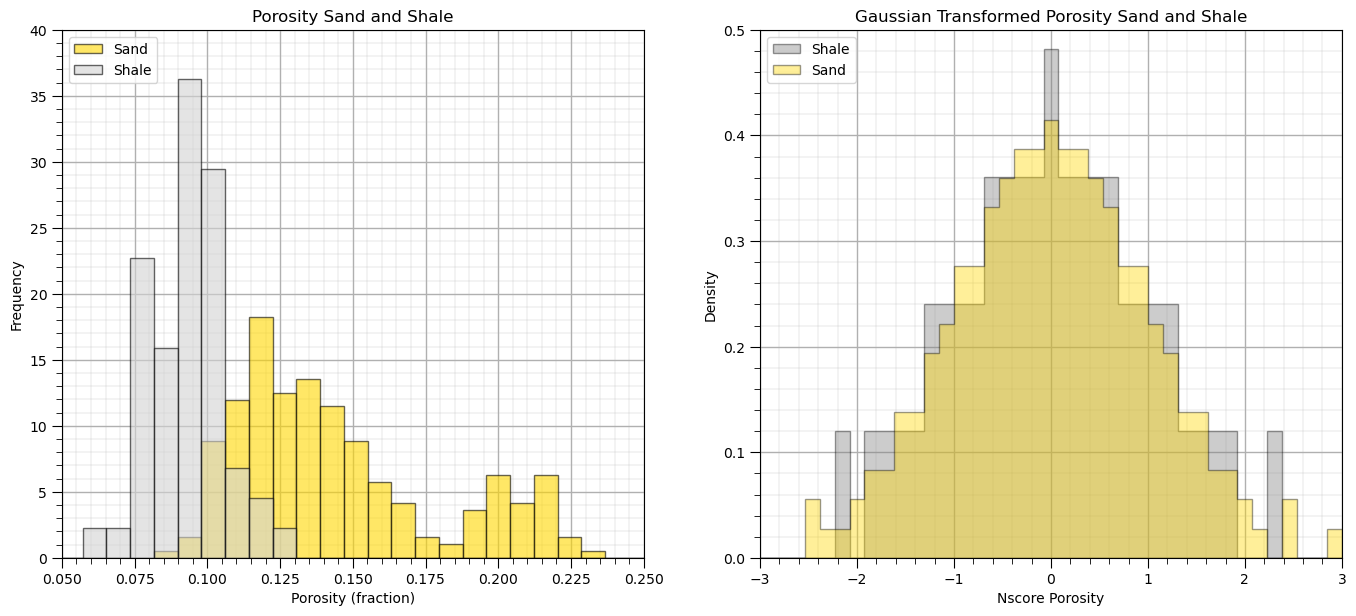

In [12]:
plt.subplot(121)                                              # plot original sand and shale porosity histograms
plt.hist(df_sand['Porosity'], facecolor='gold',bins=np.linspace(0.0,0.4,50),alpha=0.6,density=True,edgecolor='black',
         label='Sand')
plt.hist(df_shale['Porosity'], facecolor='lightgrey',bins=np.linspace(0.0,0.4,50),alpha=0.6,density=True,edgecolor='black',
         label = 'Shale')
plt.xlim([0.05,0.25]); plt.ylim([0,40.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Sand and Shale')
plt.legend(loc='upper left'); add_grid()

plt.subplot(122)                                              # plot nscore transformed sand and shale histograms
plt.hist(df_shale['NPor'], facecolor='grey',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled",alpha=0.4,density=True,
         cumulative=False,edgecolor='black',label='Shale')
plt.hist(df_sand['NPor'], facecolor='gold',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled",alpha=0.4,density=True,
         cumulative=False,edgecolor='black',label='Sand')
plt.xlim([-3.0,3.0]); plt.ylim([0,0.50])
plt.xlabel('Nscore Porosity'); plt.ylabel('Density'); plt.title('Gaussian Transformed Porosity Sand and Shale')
plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

#### Location Maps

The normal score transform has correctly transformed the porosity over sand and shale facies to standard normal.  

* Let's plot the location maps of normal score transforms of porosity and permeability for all facies, sand facies and shale facies.
* From the nominal minimum data spacing we can select a lag size
* From the 1/2 the data extent we can see the number of lags that we can reliably calculate

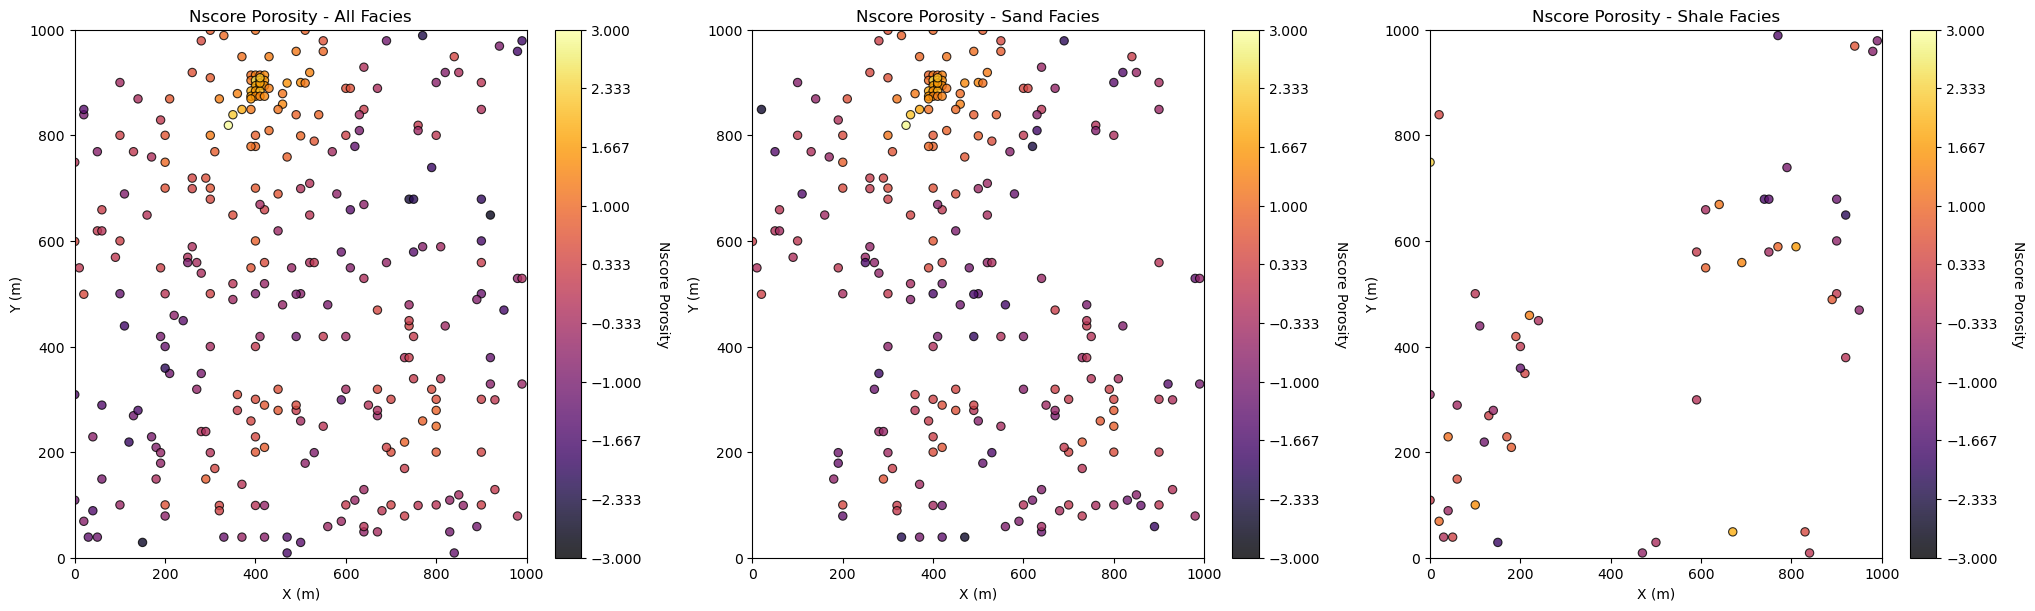

In [13]:
plt.subplot(131)                                              # location map all facies
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)

plt.subplot(132)                                              # location map sand only
GSLIB.locmap_st(df_sand,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - Sand Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap)

plt.subplot(133)                                              # location map shale only
GSLIB.locmap_st(df_shale,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - Shale Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

Let's see the parameters for the gamv, irregular data, GeostatsPy's experimental variogram calculation function.

In [14]:
geostats.gamv                                                 # see the input parameters required by the gamv function

<function geostatspy.geostats.gamv(df, xcol, ycol, vcol, tmin, tmax, xlag, xltol, nlag, azm, atol, bandwh, isill)>

We can use the location maps to help determine good variogram calculation parameters.

#### Variogram Calculation

We are ready to calculate variogram! Let's calculate directional variograms for the transformed normal score porosity for sand, shale and all (without separating sand and shale).  Some information on the parameters that I chose:

```p
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 50.0; nlag = 7; bandh = 9999.9; azi = 45; atol = 22.5; isill = 1
```
* tmin, tmax are trimming limits - set to have no impact, no need to filter the data
* lag_dist, lag_tol are the lag distance, lag tolerance - set based on the common data spacing (100m) and tolerance as 100% of lag distance for additional smoothing
* nlag is number of lags - set to extend just past 50 of the data extent
* bandh is the horizontal band width - set to have no effect
* azi is the azimuth of the major direction, we determined this from our previous workflow on spatial continuity directions
* atol is the azimuth tolerance, 22.5 is a commonly used tolerance, we could increase it to smooth the experimental variograms
* isill is a boolean to standardize the distribution to a variance of 1 - it has no effect since the nscore transform sets the variance to 1.0

Let's try running these variograms and visualizing them.

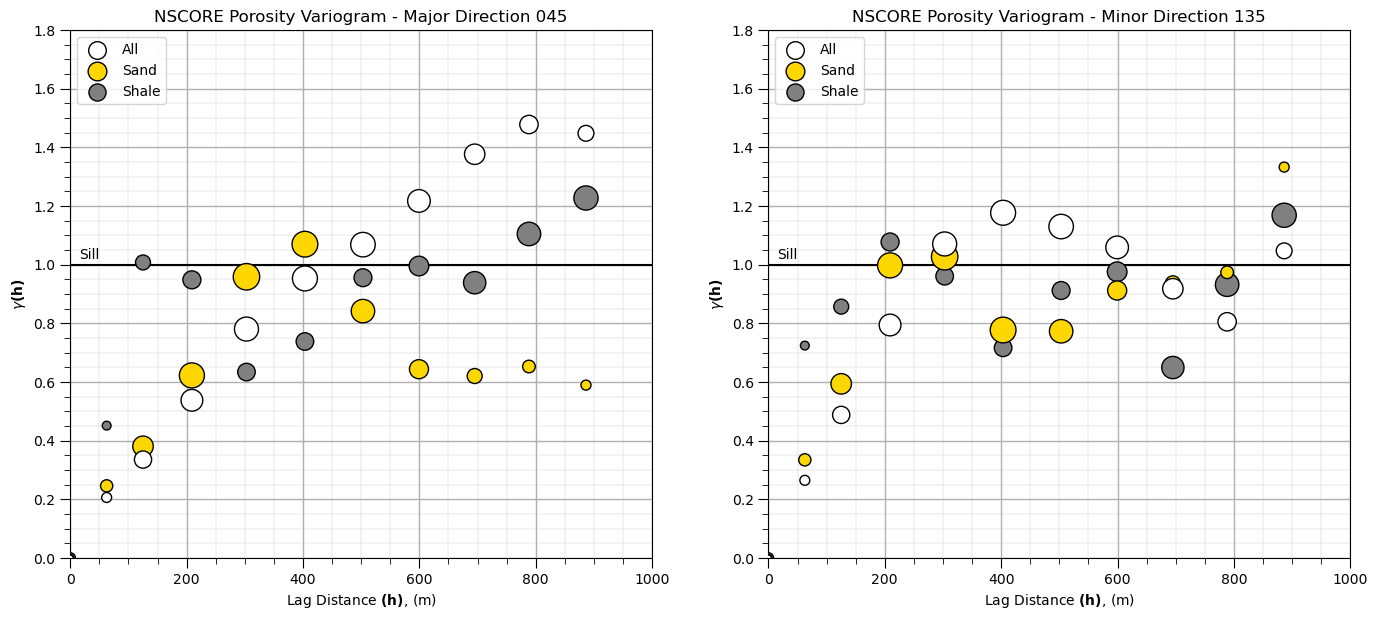

In [15]:
lag_dist = 100.0; lag_tol = 100.0; nlag = 10; bandh = 9999.9; azi = 45; atol = 22.5; isill = 1 # variogram parameters

lag, por_sand_maj_gamma, por_sand_maj_npair = geostats.gamv(df_sand,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,
            bandh,isill)
lag, por_shale_maj_gamma, por_shale_maj_npair = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,
            bandh,isill)
lag, por_maj_gamma, por_maj_npair = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

lag, por_sand_min_gamma, por_sand_min_npair = geostats.gamv(df_sand,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi+90.0,atol,
            bandh,isill)
lag, por_shale_min_gamma, por_shale_min_npair = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi+90.0,atol,
            bandh,isill)
lag, por_min_gamma, por_min_npair = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi+90.0,atol,bandh,isill)

plt.subplot(121)                                              # plot the major variograms
plt.scatter(lag,por_maj_gamma,color = 'white',edgecolor='black',s=por_maj_npair/17,marker='o',label = 'All',zorder=10)
plt.scatter(lag,por_sand_maj_gamma,color = 'gold',edgecolor='black',s=por_sand_maj_npair/10,marker='o',label = 'Sand',zorder=9)
plt.scatter(lag,por_shale_maj_gamma,color = 'grey',edgecolor='black',s=por_shale_maj_npair,marker='o',label = 'Shale',zorder=8)
plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('NSCORE Porosity Variogram - Major Direction 0' + str(azi))
plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()

plt.subplot(122)                                              # plot the minor variograms
plt.scatter(lag,por_min_gamma,color = 'white',edgecolor='black',s=por_maj_npair/17,marker='o',label = 'All',zorder=10)
plt.scatter(lag,por_sand_min_gamma,color = 'gold',edgecolor='black',s=por_sand_maj_npair/10,marker='o',label = 'Sand',zorder=9)
plt.scatter(lag,por_shale_min_gamma,color = 'grey',edgecolor='black',s=por_shale_maj_npair,marker='o',label = 'Shale',zorder=8)
plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('NSCORE Porosity Variogram - Minor Direction ' + str(azi+90))
plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

Note, we have scaled the size of the points to the relative number of pairs

* small points have fewer data pairs; therefore, are less reliable

We will assume these models will be applied in sequential Gaussian simulation; therefore, we must model to the sill (or the global distribution will not be reproduced over the realizations).  We will also not use cyclicity for now, as we are just getting started.  

* Let's build a reasonable model to the sill.

#### Model the Combined Facies Variogram

We use GeostatsPy's make_variogram function to make a variogram model object

* it is a dictionary for compact storage of the variogram model parameters to pass into plotting (below), kriging and simulation methods 

The variogram model parameter include:

* **nug** - nugget effect contribution to sill
* **nst** - number of nested structures (1 or 2)
* **it** - type for this nested structure (1 - spherical, 2 - exponential, 3 - Gaussian)
* **cc** - contribution of each nested structure (contributions + nugget must sum to the sill)
* **azi** - the azimuth for this nested structure of the major direction, the minor is orthogonal
* **hmaj** - the range for this nested structure in the major direction
* **hmin** - the range for this nested structure in the minor direction

we use an array for it, cc, azi, hmaj, and hmin for the 1st and 2nd structures

* for only 1 structure plus optional nugget, omit the 2nd structure parameters and they will default to $cc2 = 0$, no contribution to the model

Let's start with all facies. Here's my model:

```p
nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 =500; hmin1 = 350                # first structure
```

Some comments on our model:

* we model to the sill of 1.0, since we applied the normal score transform ($nug + cc1 + cc2 = 1.0$)
* we used 2 spherical structures to capture zonal anisotropy in the 045 azimuth
* since the experimental variogram exceeds the sill with trend or cyclicity we could have attempted trend modeling and then worked with the residual, but we will not do this for workflow brevity and simplicity

We input these model parameters to make a variogram model dictionary with the make_variogram function as follows:

```p
vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2)
```

In [16]:
nug = 0.0; nst = 1                                             # 2 nest structure variogram model parameters
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 500; hmin1 = 350
it2 = 0; cc2 = 0.0; azi2 = 0; hmaj2 = 0; hmin2 = 0

vario_porosity = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2) # make model object

#### Plotting the Variogram Model

To plot the variogram we use GeostatsPy's vmodel function to project the model to a set of lag distances in the major and minor directions.

The inputs for vmodel are:

* **nlag** - the number of points along the variogram to calculate for the projection

* **xlag** - the size of a lag for the projection

* **azm** - the direction of the projection in azimuth (this is all we need since we are working in 2D)

* **vario** - the variogram model dictionary from the make_variogram function (above)

Note: this function is just for visualization by projecting the variogram model in a direction, so the convention is to use a very small **xlag** and large **nlag** for a high resolution display of the variogram model

The outputs from the vmodel program include:

* **index** - the lag number for the projection

* **lag distance** - the distance offset along the projection (the **h** in the variogram plot)

* **variogram** - the variogram value at the lag distance for the projection (the $\gamma$(**h**) in the variogram plot)

* **covariance function** - the covariance function at the lag distance for the projection (for the C(**h**) plot)

* **correlogram** - the correlogram at the lag distance for the projection (for the $\rho$(**h**) plot)

We have 1 structure and no nugget effect.  

 x,y,z offsets = 7.071067805519558,7.071067818211393


 x,y,z offsets = 7.071067830903227,-7.071067792827723


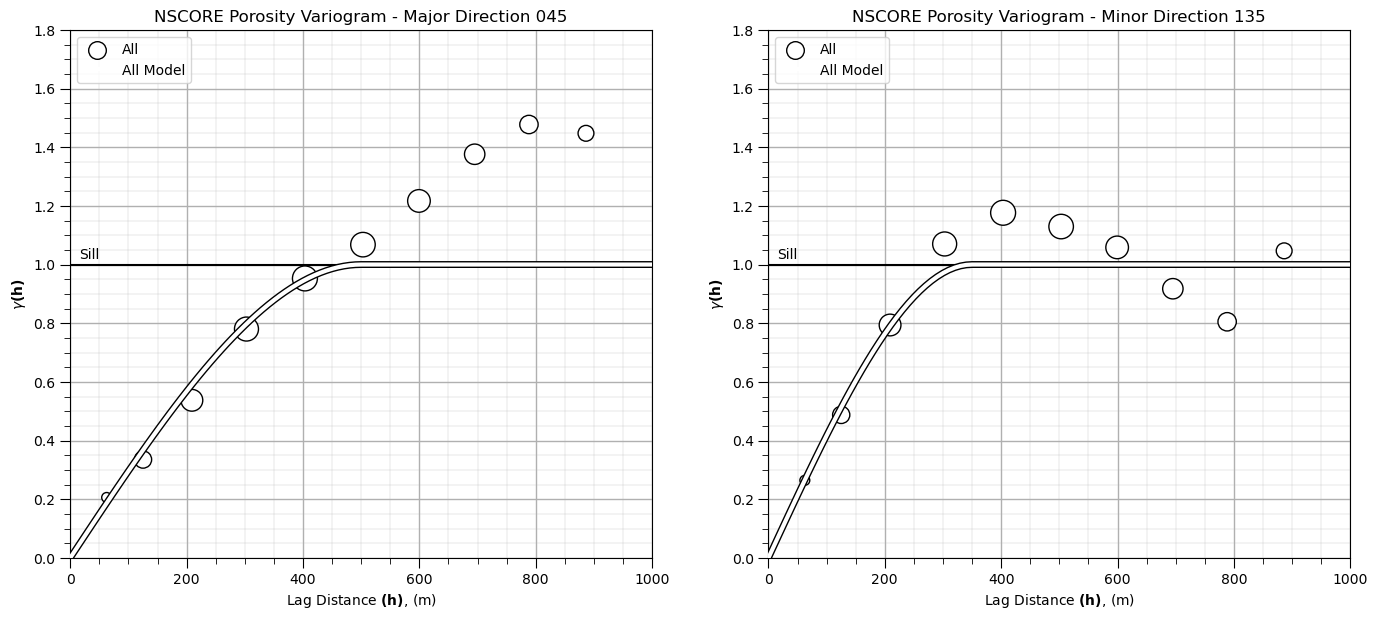

In [17]:
nlag = 100; xlag = 10; azm = 45                               # project the model in the 045 and 135 azimuth
index45,h45,gam45,cov45,ro45 = geostats.vmodel(nlag,xlag,azm,vario_porosity)
index135,h135,gam135,cov135,ro135 = geostats.vmodel(nlag,xlag,azm+90,vario_porosity)

plt.subplot(121)                                              # plot the major variograms
plt.scatter(lag,por_maj_gamma,color = 'white',edgecolor='black',s=por_maj_npair/17,marker='o',label = 'All',zorder=10)
plt.plot(h45,gam45,color='white',lw=3,zorder=100,label = 'All Model')
plt.plot(h45,gam45,color='black',lw=5,zorder=90)
plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('NSCORE Porosity Variogram - Major Direction 0' + str(azi))
plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()

plt.subplot(122)                                              # plot the minor variograms
plt.scatter(lag,por_min_gamma,color = 'white',edgecolor='black',s=por_maj_npair/17,marker='o',label = 'All',zorder=10)
plt.plot(h135,gam135,color='white',lw=3,zorder=100,label = 'All Model')
plt.plot(h135,gam135,color='black',lw=5,zorder=90)
plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('NSCORE Porosity Variogram - Minor Direction ' + str(azi+90))
plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

That looks pretty good, remember we only model to the sill and not above the sill.

Now let's add variogram models for Gaussian transformed sand and shale porosity.

 x,y,z offsets = 7.071067805519558,7.071067818211393
 x,y,z offsets = 7.071067830903227,-7.071067792827723
 x,y,z offsets = 7.071067805519558,7.071067818211393
 x,y,z offsets = 7.071067830903227,-7.071067792827723


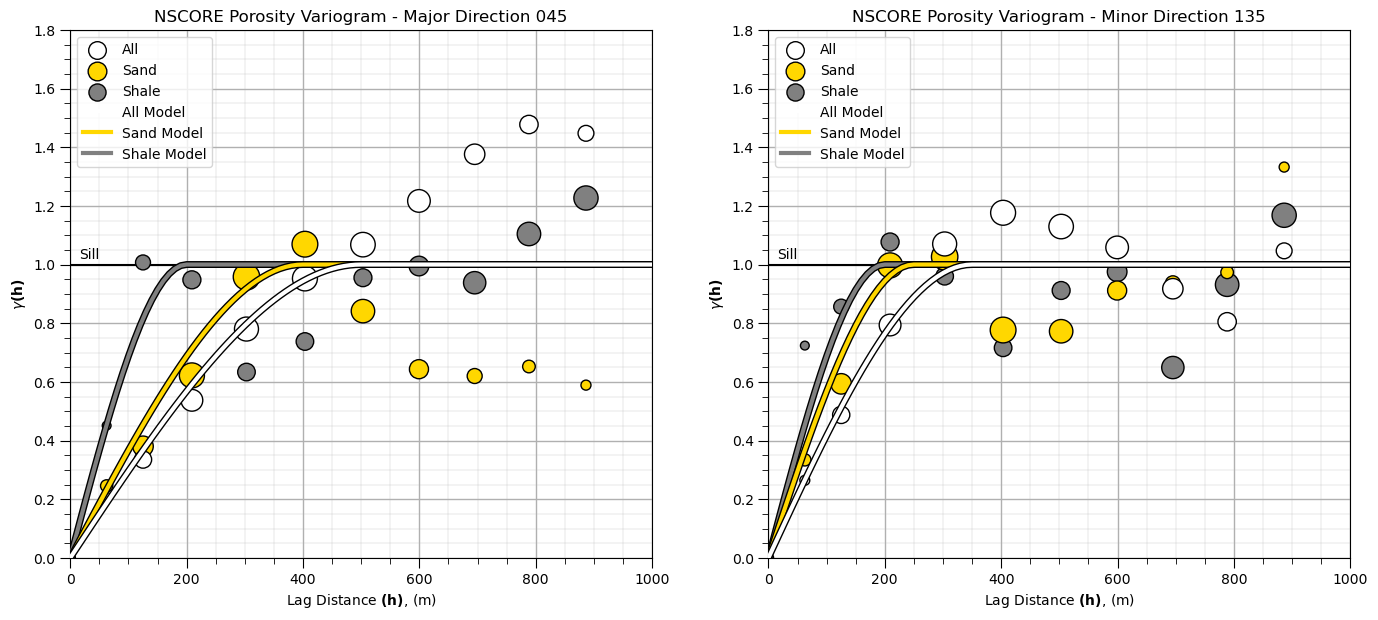

In [18]:
nug = 0.0; nst = 1                                             # sand variogram
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 400; hmin1 = 250
it2 = 0; cc2 = 0.0; azi2 = 0; hmaj2 = 0; hmin2 = 0

vario_sand_porosity = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2) # make model object

index45,h45_sand,gam45_sand,cov45,ro45 = geostats.vmodel(nlag,xlag,azm,vario_sand_porosity)
index135,h135_sand,gam135_sand,cov135,ro135 = geostats.vmodel(nlag,xlag,azm+90,vario_sand_porosity)

nug = 0.0; nst = 1                                             # shale variogram
it1 = 1; cc1 = 1.0; azi1 = 45; hmaj1 = 200; hmin1 = 200
it2 = 0; cc2 = 0.0; azi2 = 0; hmaj2 = 0; hmin2 = 0

vario_shale_porosity = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2) # make model object

index45,h45_shale,gam45_shale,cov45,ro45 = geostats.vmodel(nlag,xlag,azm,vario_shale_porosity)
index135,h135_shale,gam135_shale,cov135,ro135 = geostats.vmodel(nlag,xlag,azm+90,vario_shale_porosity)

plt.subplot(121)                                              # plot the major variograms
plt.scatter(lag,por_maj_gamma,color = 'white',edgecolor='black',s=por_maj_npair/17,marker='o',label = 'All',zorder=10)
plt.scatter(lag,por_sand_maj_gamma,color = 'gold',edgecolor='black',s=por_sand_maj_npair/10,marker='o',label = 'Sand',zorder=9)
plt.scatter(lag,por_shale_maj_gamma,color = 'grey',edgecolor='black',s=por_shale_maj_npair,marker='o',label = 'Shale',zorder=8)

plt.plot(h45,gam45,color='white',lw=3,zorder=100,label = 'All Model')
plt.plot(h45,gam45,color='black',lw=5,zorder=90)
plt.plot(h45_sand,gam45_sand,color='gold',lw=3,zorder=80,label = 'Sand Model')
plt.plot(h45_sand,gam45_sand,color='black',lw=5,zorder=70)
plt.plot(h45_shale,gam45_shale,color='grey',lw=3,zorder=60,label = 'Shale Model')
plt.plot(h45_shale,gam45_shale,color='black',lw=5,zorder=50)

plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('NSCORE Porosity Variogram - Major Direction 0' + str(azi))
plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()

plt.subplot(122)                                              # plot the minor variograms
plt.scatter(lag,por_min_gamma,color = 'white',edgecolor='black',s=por_maj_npair/17,marker='o',label = 'All',zorder=10)
plt.scatter(lag,por_sand_min_gamma,color = 'gold',edgecolor='black',s=por_sand_maj_npair/10,marker='o',label = 'Sand',zorder=9)
plt.scatter(lag,por_shale_min_gamma,color = 'grey',edgecolor='black',s=por_shale_maj_npair,marker='o',label = 'Shale',zorder=8)

plt.plot(h135,gam135,color='white',lw=3,zorder=100,label = 'All Model')
plt.plot(h135,gam135,color='black',lw=5,zorder=90)
plt.plot(h135_sand,gam135_sand,color='gold',lw=3,zorder=80,label = 'Sand Model')
plt.plot(h135_sand,gam135_sand,color='black',lw=5,zorder=70)
plt.plot(h135_shale,gam135_shale,color='grey',lw=3,zorder=60,label = 'Shale Model')
plt.plot(h135_shale,gam135_shale,color='black',lw=5,zorder=50)

plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('NSCORE Porosity Variogram - Minor Direction ' + str(azi+90))
plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

The experimental variograms have some interesting features:

* the range of the sand porosity is greater than the shale porosity range
* although the shale short range experimental points may be noisy due to sparse shale data

#### Comments

This was a basic demonstration of variogram calculation and modeling with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main). 

For example, check out my: 

* [interactive variogram calculation dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Variogram_Calculation.ipynb)
* [interactive variogram modeling dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Variogram_Modeling.ipynb)

I hope this is helpful,

*Michael*

#### The Author:

Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
  